In [377]:
import auxiliary
import models
from constants import constants
from maneuvers import Maneuvers
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import datetime
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Atmospheric Drag
<img src="validation/atmDragExample.png" style="width:800px"/>

In [445]:
# CURTIS VER. 2013, PAGE 659
rp = 6593e3
ra = 7317e3
Omega = 340*np.pi/180
i = 65.1*np.pi/180
omega = 58*np.pi/180
nu = 332*np.pi/180
a = (rp+ra)/2
e = ra/a-1
coe = [a,e,i,omega,Omega,nu]
satellite = models.CurtisSat()

maneuver = Maneuvers(coe,satellite,date,formulation="betts")
maneuver.addPerturbation("atmosphere")
maneuver.propagate(60*60*24*108.1,60);

Propagating...from day  0.0  to  108.10000000000001


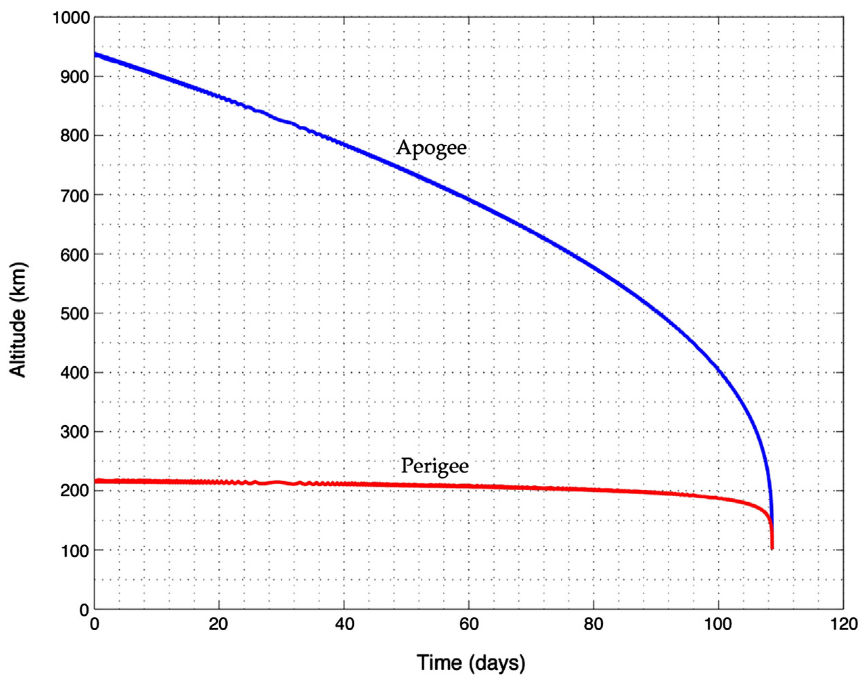

<IPython.core.display.Javascript object>


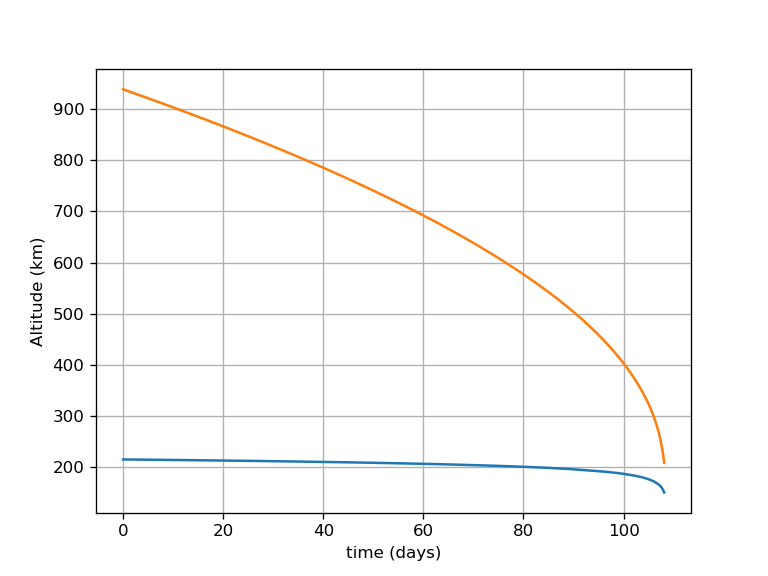

In [446]:
display(Image(filename='validation/atmDrag.png',width="600px")) 
plt.figure()
plt.plot(maneuver.history.t/60/60/24,(maneuver.history.coe[:,0]*(1-maneuver.history.coe[:,1])-constants.Re)/1000)
plt.plot(maneuver.history.t/60/60/24,(maneuver.history.coe[:,0]*(1+maneuver.history.coe[:,1])-constants.Re)/1000)
plt.ylabel("Altitude (km)")
plt.xlabel("time (days)")
plt.grid()

## J2
<img src="validation/J2Example.png" style="width:800px"/>

In [191]:
# CURTIS VER. 2013, PAGE 665
rp = 6678e3
ra = 9940e3
Omega = 45*np.pi/180
i = 28*np.pi/180
omega = 30*np.pi/180
nu = 40*np.pi/180
a = (rp+ra)/2
e = ra/a-1
coe = [a,e,i,omega,Omega,nu]
satellite = models.CurtisSat()

maneuver2 = Maneuvers(coe,satellite,date,formulation="betts")
maneuver2.addPerturbation("J2")
maneuver2.propagate(60*60*50,60);

Propagating...from day  0.0  to  2.0833333333333335


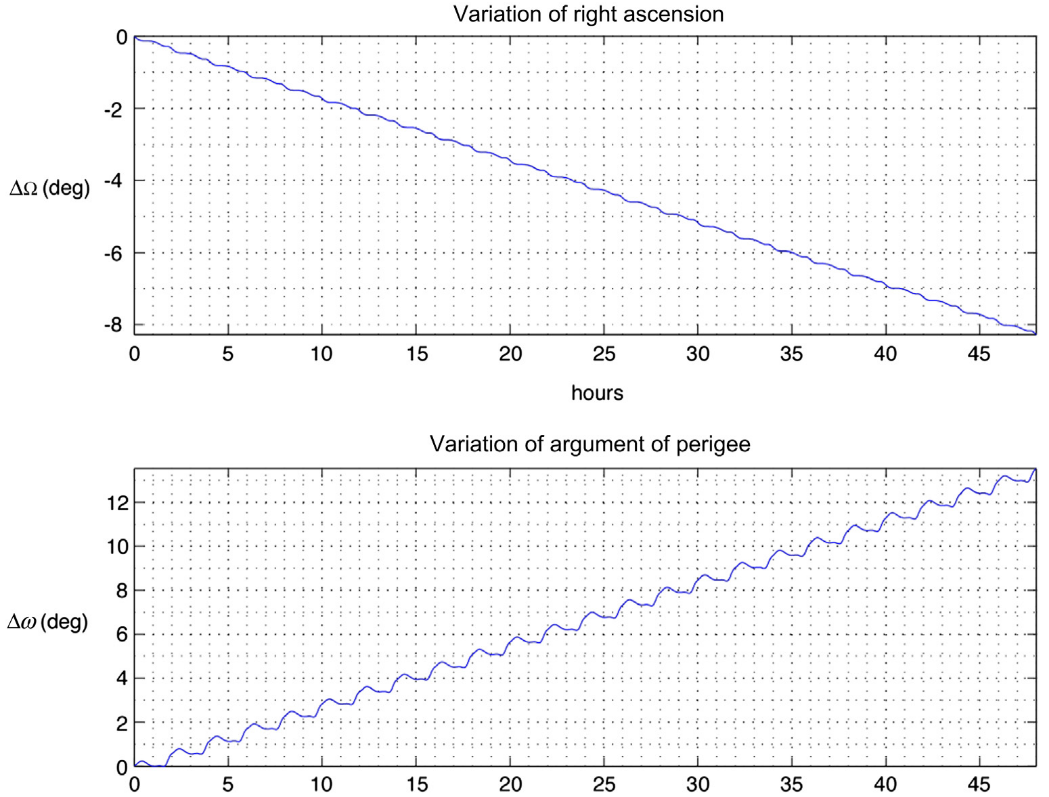

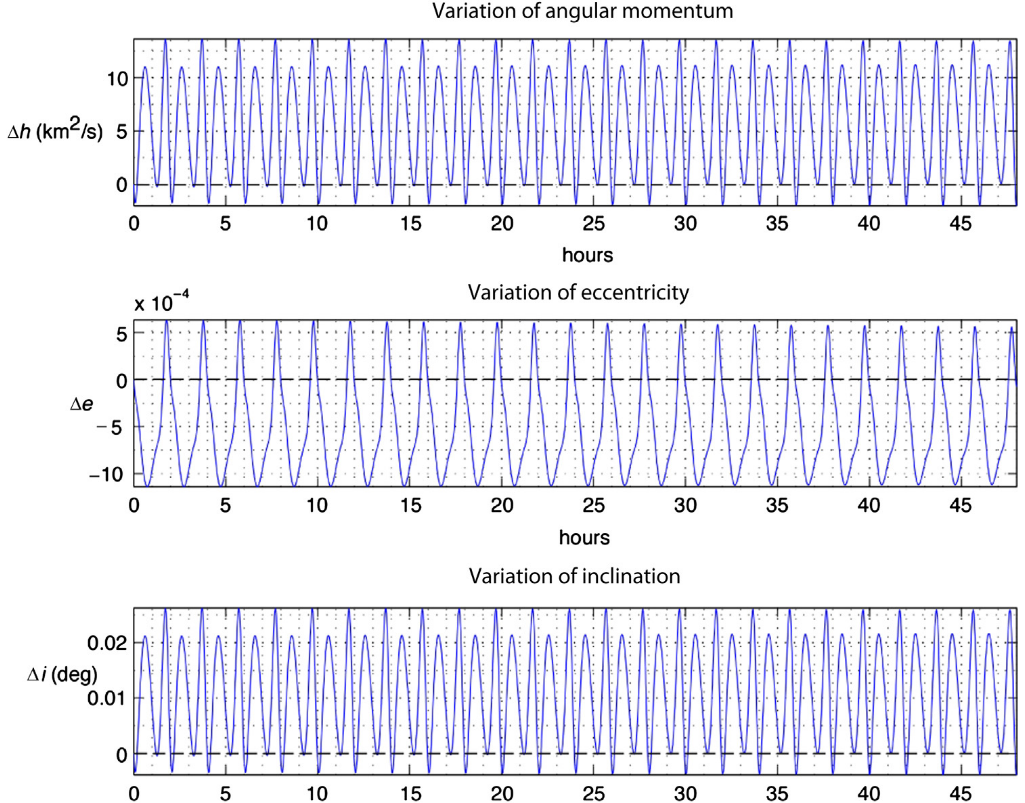

<IPython.core.display.Javascript object>


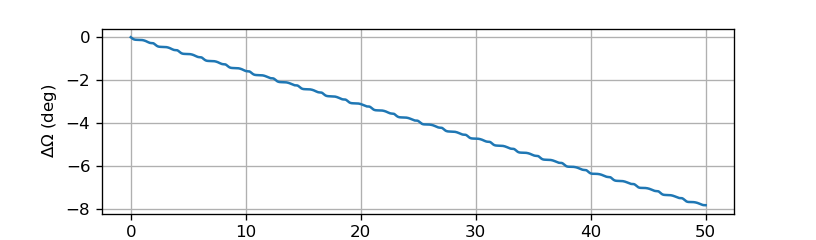

<IPython.core.display.Javascript object>


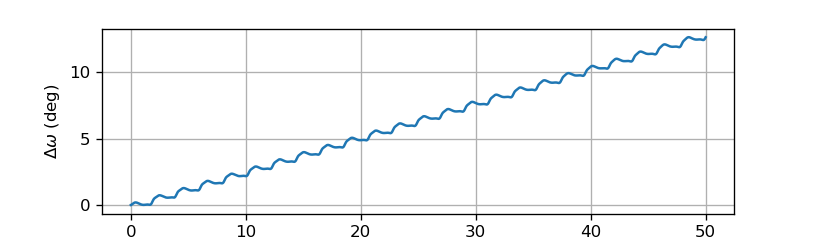

<IPython.core.display.Javascript object>


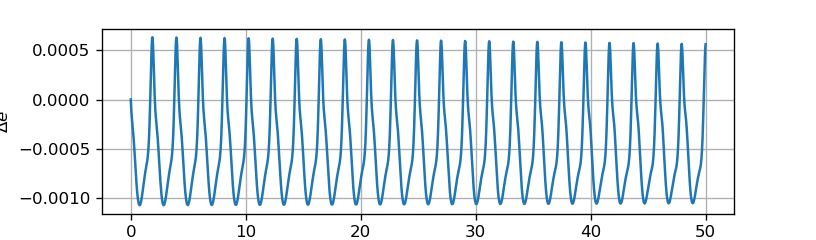

<IPython.core.display.Javascript object>


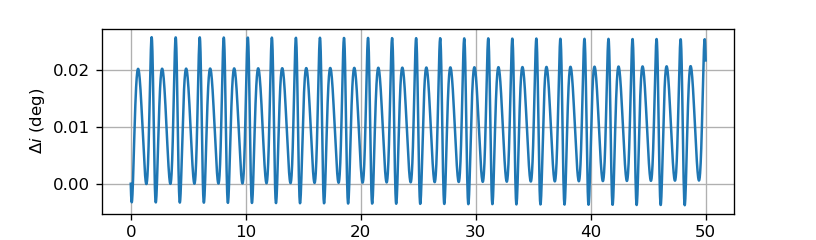

In [212]:
display(Image(filename='validation/J2.png',width="600px")) 
display(Image(filename='validation/J2_2.png',width="600px")) 
plt.figure(figsize=(6.8,2))
plt.plot(maneuver2.history.t/60/60, (maneuver2.history.coe[:,4]-maneuver2.history.coe[0,4])*180/np.pi)
plt.ylabel("$\Delta\Omega$ (deg)")
plt.xlabel("time (hours)")
plt.grid()
plt.figure(figsize=(6.8,2))
plt.plot(maneuver2.history.t/60/60, (maneuver2.history.coe[:,3]-maneuver2.history.coe[0,3])*180/np.pi)
plt.ylabel("$\Delta\omega$ (deg)")
plt.xlabel("time (hours)")
plt.grid()
plt.figure(figsize=(6.8,2))
plt.plot(maneuver2.history.t/60/60, (maneuver2.history.coe[:,1]-maneuver2.history.coe[0,1]))
plt.ylabel("$\Delta e$")
plt.xlabel("time (hours)")
plt.grid()
plt.figure(figsize=(6.8,2))
plt.plot(maneuver2.history.t/60/60, (maneuver2.history.coe[:,2]-maneuver2.history.coe[0,2])*180/np.pi)
plt.ylabel("$\Delta i$ (deg)")
plt.xlabel("time (hours)")
plt.grid()

## Solar Radiation Pressure
<img src="validation/radPressureExample.png" style="width:800px"/>

In [260]:
# CURTIS VER. 2013, PAGE 703
h = 63383.4e6
e = 0.025422
a = h**2/(constants.mu_E*(1-e**2))
Omega = 45.3812*np.pi/180
i = 88.3924*np.pi/180
omega = 227.493*np.pi/180
nu = 343.427*np.pi/180

coe = [a,e,i,omega,Omega,nu]
satellite = models.CurtisSat()
satellite.area = 2*satellite.dryMass
date = datetime(year=1964,month=1,day=6)

maneuver3 = Maneuvers(coe,satellite,date,formulation="betts",verbose=True)
maneuver3.addPerturbation("solar_pressure")
maneuver3.propagate(60*60*24*1000,60);

Propagating...from day  0.0  to  1000.0
Day:0.0	Height: 3471.0827725071217 km	Mass: 0.0
Day:8.477074826013585e-08	Height: 3471.0824388533347 km	Mass: 0.0
Day:8.477074826013585e-08	Height: 3471.0824388533106 km	Mass: 0.0
Day:1.695414965202717e-07	Height: 3471.0821052048896 km	Mass: 0.0
Day:1.695414965202717e-07	Height: 3471.0821052048673 km	Mass: 0.0
Day:0.00044511317834063693	Height: 3469.4049518046418 km	Mass: 0.0
Day:0.00044511317834063693	Height: 3469.404963785561 km	Mass: 0.0
Day:0.0008900568151847535	Height: 3467.876703284215 km	Mass: 0.0
Day:0.0008900568151847535	Height: 3467.876725125009 km	Mass: 0.0
Day:6.000012903920575	Height: 3762.6003742853422 km	Mass: 0.0
Day:6.000012903920575	Height: 3762.588110018719 km	Mass: 0.0
Day:10.000386943138325	Height: 3974.969574702136 km	Mass: 0.0
Day:10.000386943138325	Height: 3974.969377556574 km	Mass: 0.0
Day:19.000947580807182	Height: 3970.761377944827 km	Mass: 0.0
Day:19.000947580807182	Height: 3970.7571372823063 km	Mass: 0.0
Day:25.000371

Day:209.00025324651628	Height: 3430.5113717183563 km	Mass: 0.0
Day:209.00025324651628	Height: 3430.4765923067926 km	Mass: 0.0
Day:211.0008151469202	Height: 3561.6352851839347 km	Mass: 0.0
Day:211.0008151469202	Height: 3561.7778137261325 km	Mass: 0.0
Day:220.0001401111987	Height: 3530.6035634751415 km	Mass: 0.0
Day:220.0001401111987	Height: 3530.6986213482005 km	Mass: 0.0
Day:228.00049694547124	Height: 3993.963170085849 km	Mass: 0.0
Day:228.00049694547124	Height: 3993.9455287822652 km	Mass: 0.0
Day:236.00085377974378	Height: 3405.1634229713586 km	Mass: 0.0
Day:236.00085377974378	Height: 3405.132874236118 km	Mass: 0.0
Day:247.0003610346212	Height: 3474.059746745996 km	Mass: 0.0
Day:247.0003610346212	Height: 3474.068448172806 km	Mass: 0.0
Day:248.00101939239372	Height: 3885.024247646546 km	Mass: 0.0
Day:248.00101939239372	Height: 3885.06366619155 km	Mass: 0.0
Day:258.0000222249848	Height: 3614.7845582945683 km	Mass: 0.0
Day:258.0000222249848	Height: 3614.947684731867 km	Mass: 0.0
Day:259.

Day:427.0001303659041	Height: 3790.326388684433 km	Mass: 0.0
Day:427.0001303659041	Height: 3790.3682022250855 km	Mass: 0.0
Day:430.0006844423308	Height: 3849.666462304935 km	Mass: 0.0
Day:430.0006844423308	Height: 3849.7196632902996 km	Mass: 0.0
Day:435.00019734285144	Height: 3597.930318102101 km	Mass: 0.0
Day:435.00019734285144	Height: 3597.9486448551042 km	Mass: 0.0
Day:443.00088196989253	Height: 3862.1479280364065 km	Mass: 0.0
Day:443.00088196989253	Height: 3862.1480972127674 km	Mass: 0.0
Day:451.00031595060653	Height: 3567.650687969528 km	Mass: 0.0
Day:451.00031595060653	Height: 3567.6480251042267 km	Mass: 0.0
Day:457.0011326914607	Height: 3826.0753810257092 km	Mass: 0.0
Day:457.0011326914607	Height: 3826.086113674272 km	Mass: 0.0
Day:460.00111164023315	Height: 3586.675547033863 km	Mass: 0.0
Day:460.00111164023315	Height: 3586.674252394421 km	Mass: 0.0
Day:465.00051855742066	Height: 3648.7228731849586 km	Mass: 0.0
Day:465.00051855742066	Height: 3648.7230036173482 km	Mass: 0.0
Day:4

Day:671.0005436228347	Height: 3650.7692331536728 km	Mass: 0.0
Day:671.0005436228347	Height: 3650.8228704959993 km	Mass: 0.0
Day:675.0007099213585	Height: 3952.164255943239 km	Mass: 0.0
Day:675.0007099213585	Height: 3952.153244628729 km	Mass: 0.0
Day:675.0007099213585	Height: 3952.1532808430156 km	Mass: 0.0
Day:675.000821320923	Height: 3952.879655473197 km	Mass: 0.0
Day:675.000821320923	Height: 3952.87955260402 km	Mass: 0.0
Day:675.0009327204874	Height: 3953.597816215273 km	Mass: 0.0
Day:675.0009327204874	Height: 3953.5977156097947 km	Mass: 0.0
Day:675.0010441200518	Height: 3954.307845881006 km	Mass: 0.0
Day:675.0010441200518	Height: 3954.3077475199866 km	Mass: 0.0
Day:675.0010127709644	Height: 3954.108820985865 km	Mass: 0.0
Day:675.0010127709644	Height: 3954.1087699536906 km	Mass: 0.0
Day:675.0010928214414	Height: 3954.6156673898063 km	Mass: 0.0
Day:675.0010928214414	Height: 3954.6156171856187 km	Mass: 0.0
Day:679.0000881649697	Height: 3904.128180172026 km	Mass: 0.0
Day:679.00008816496

Day:991.000087360424	Height: 3643.14552275667 km	Mass: 0.0
Day:991.000087360424	Height: 3643.2789344874136 km	Mass: 0.0
Day:1000.0004130901508	Height: 3666.378304901738 km	Mass: 0.0
Day:1000.0004130901508	Height: 3666.4245237456785 km	Mass: 0.0
0.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%


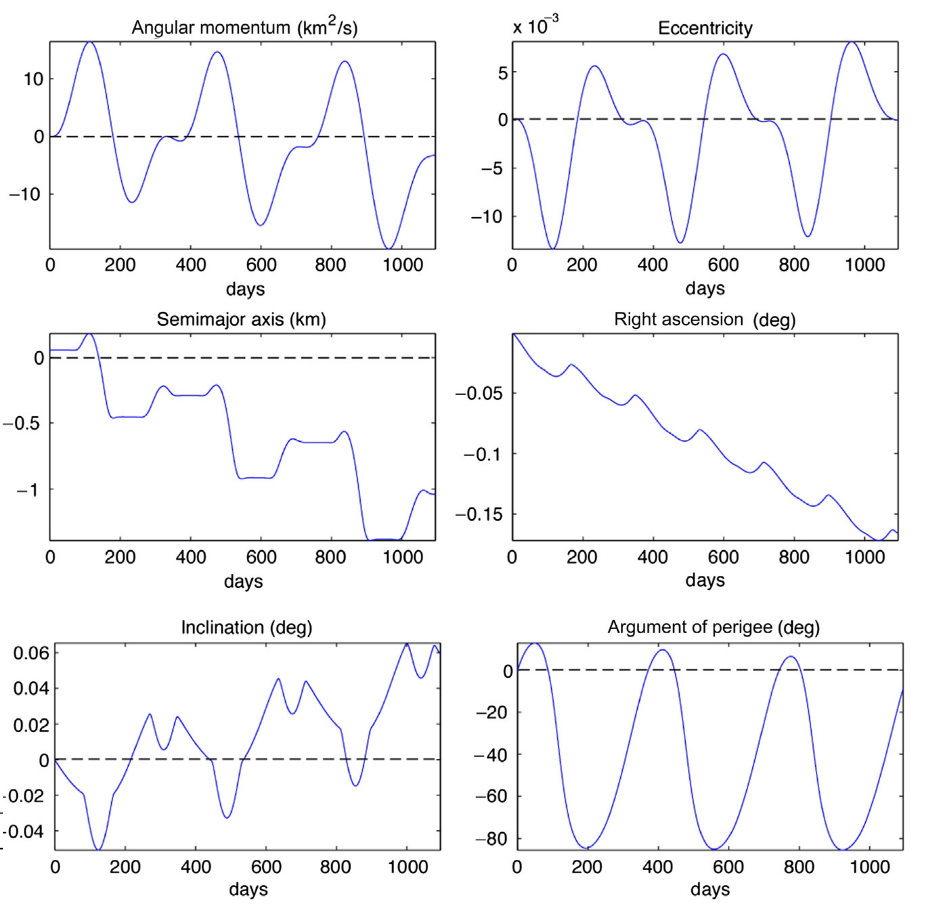

<IPython.core.display.Javascript object>


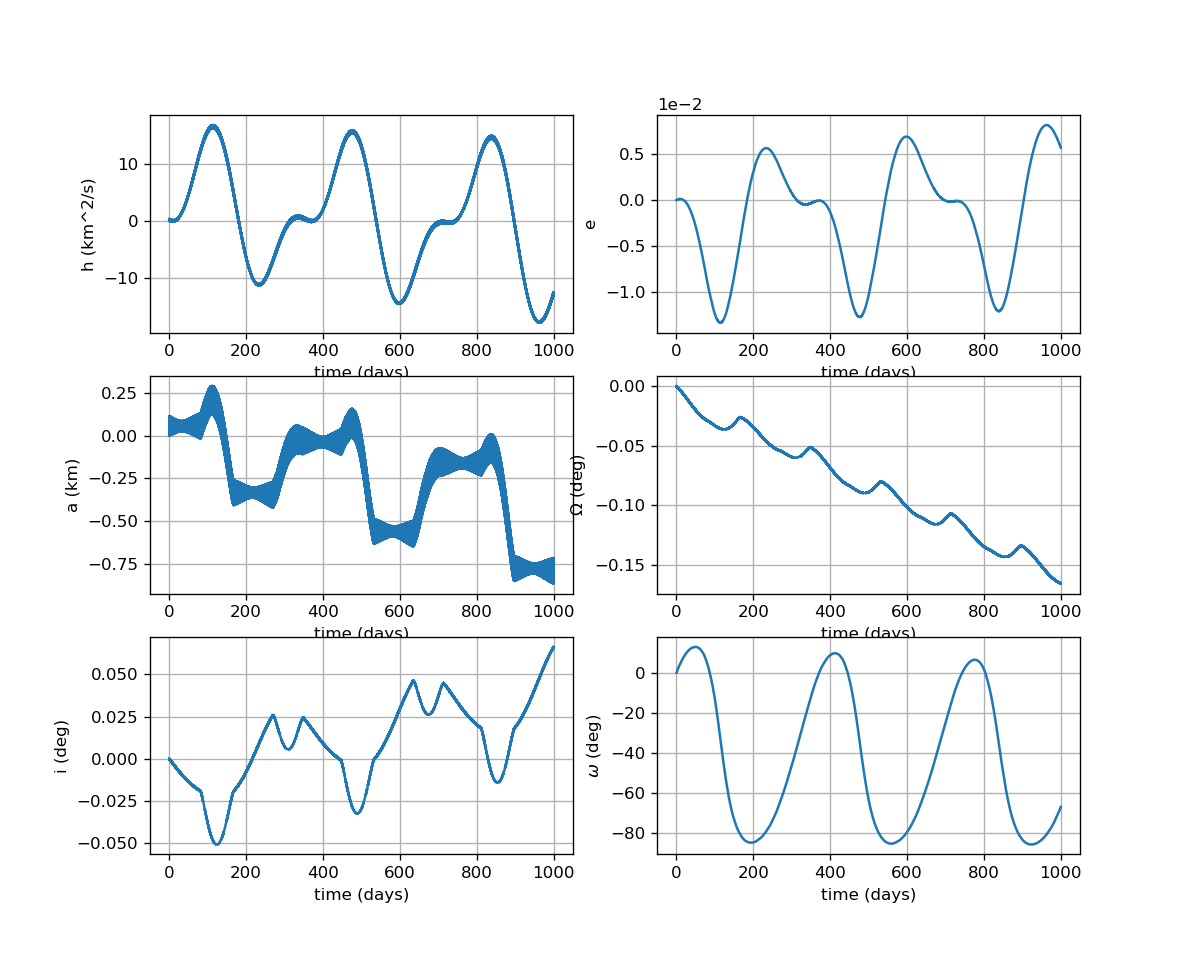

In [267]:
display(Image(filename='validation/radPressure.png',width="600px"))

plt.figure(figsize=(10,8))
plt.subplot(321)
h = np.sqrt(maneuver3.history.coe[:,0]*constants.mu_E*(1-maneuver3.history.coe[:,1]**2))
h0 = np.sqrt(maneuver3.history.coe[0,0]*constants.mu_E*(1-maneuver3.history.coe[0,1]**2))
plt.plot(maneuver3.history.t/60/60/24, (h-h0)/1e6)
plt.ylabel("h (km^2/s)")
plt.xlabel("time (days)")
plt.grid()
plt.subplot(322)
plt.plot(maneuver3.history.t/60/60/24, maneuver3.history.coe[:,1]-maneuver3.history.coe[0,1])
plt.ylabel("e")
plt.xlabel("time (days)")
plt.grid()
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplot(323)
plt.plot(maneuver3.history.t/60/60/24, (maneuver3.history.coe[:,0]-maneuver3.history.coe[0,0])/1000)
plt.ylabel("a (km)")
plt.xlabel("time (days)")
plt.grid()
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplot(324)
plt.plot(maneuver3.history.t/60/60/24, (maneuver3.history.coe[:,4]-maneuver3.history.coe[0,4])*180/np.pi)
plt.ylabel("$\Omega$ (deg)")
plt.xlabel("time (days)")
plt.grid()
plt.subplot(325)
plt.plot(maneuver3.history.t/60/60/24, (maneuver3.history.coe[:,2]-maneuver3.history.coe[0,2])*180/np.pi)
plt.ylabel("i (deg)")
plt.xlabel("time (days)")
plt.grid()
plt.ticklabel_format(style='sci', axis='y')
plt.subplot(326)
plt.plot(maneuver3.history.t/60/60/24, (maneuver3.history.coe[:,3]-maneuver3.history.coe[0,3])*180/np.pi)
plt.ylabel("$\omega$ (deg)")
plt.xlabel("time (days)")
plt.grid()
plt.ticklabel_format(style='sci', axis='y')

## Lunar Gravity
<img src="validation/lunarGravityExample.png" style="width:800px"/>

In [431]:
# CURTIS VER. 2013, PAGE 710
h_LEO = 51591.1e6
e_LEO = 0.01
a_LEO = h**2/(constants.mu_E*(1-e**2))
a_LEO = 6678.136e3
Omega_LEO = 0*np.pi/180
i_LEO = 28.5*np.pi/180
omega_LEO = 0*np.pi/180
nu_LEO = 0*np.pi/180

h_HEO = 69084.1e6
e_HEO = 0.741
a_HEO = h**2/(constants.mu_E*(1-e**2))
a_HEO = 26553.4e3
Omega_HEO = 0*np.pi/180
i_HEO = 63.4*np.pi/180
omega_HEO = 270*np.pi/180
nu_HEO = 0*np.pi/180

h_GEO = 129640e6
e_GEO = 0.0001
a_GEO = h**2/(constants.mu_E*(1-e**2))
a_GEO = 42164e3
Omega_GEO = 0*np.pi/180
i_GEO = 1*np.pi/180
omega_GEO = 0*np.pi/180
nu_GEO = 0*np.pi/180

coeLEO = [a_LEO,e_LEO,i_LEO,omega_LEO,Omega_LEO,nu_LEO]
coeHEO = [a_HEO,e_HEO,i_HEO,omega_HEO,Omega_HEO,nu_HEO]
coeGEO = [a_GEO,e_GEO,i_GEO,omega_GEO,Omega_GEO,nu_GEO]

satellite = models.CurtisSat()
satellite.area = 2*satellite.dryMass
date = datetime(year=2007,month=7,day=1,hour=12)

maneuver4LEO = Maneuvers(coeLEO,satellite,date,formulation="betts")
maneuver4LEO.addPerturbation("moon_gravity")
maneuver4LEO.propagate(60*60*24*60,60*60);

maneuver4HEO = Maneuvers(coeHEO,satellite,date,formulation="betts")
maneuver4HEO.addPerturbation("moon_gravity")
maneuver4HEO.propagate(60*60*24*60,60*60);

maneuver4GEO = Maneuvers(coeGEO,satellite,date,formulation="betts")
maneuver4GEO.addPerturbation("moon_gravity")
maneuver4GEO.propagate(60*60*24*60,60);
print("-Done-")

Propagating...from day  0.0  to  60.0
Propagating...from day  0.0  to  60.0
Propagating...from day  0.0  to  60.0
-Done-


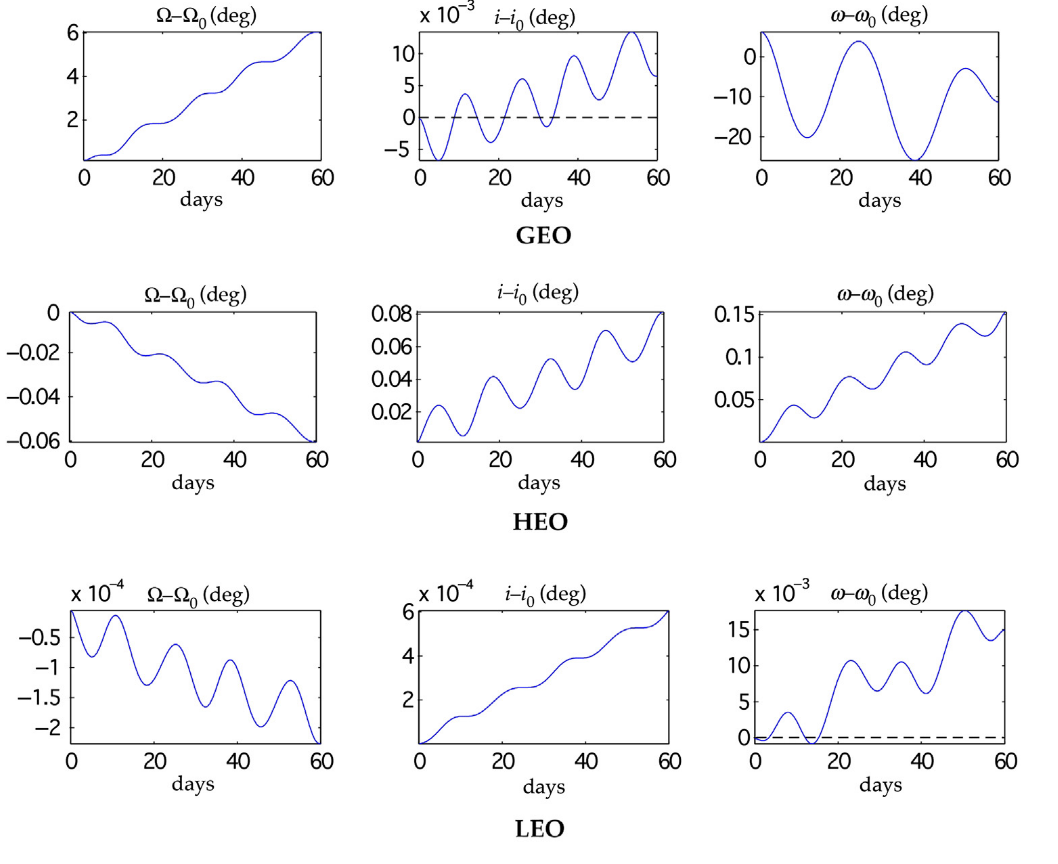

<IPython.core.display.Javascript object>


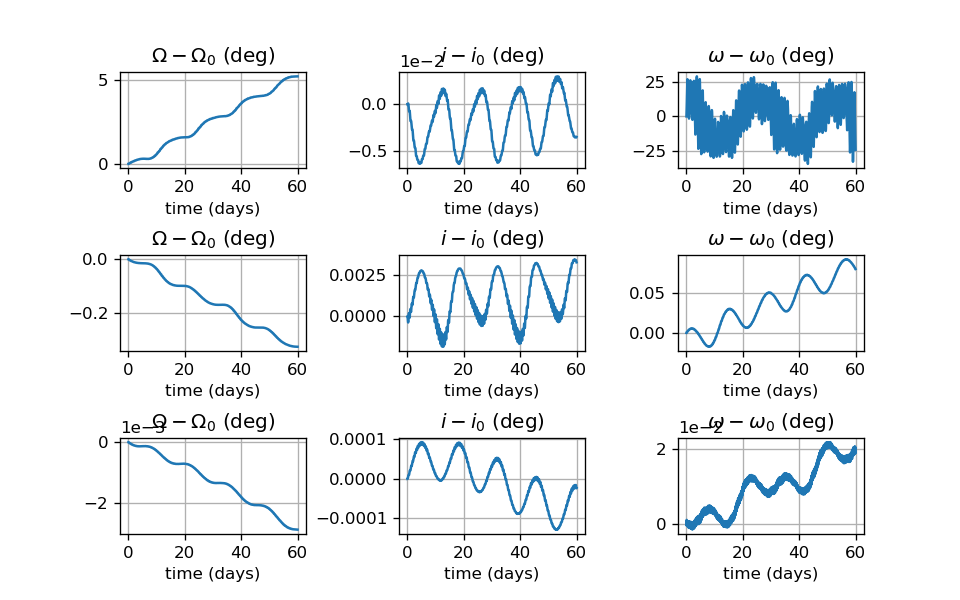

In [433]:
display(Image(filename='validation/lunarGravity.png',width="600px"))

plt.figure(figsize=(8,5))
plt.subplot(331)
plt.plot(maneuver4GEO.history.t/60/60/24, (((maneuver4GEO.history.coe[:,4]-maneuver4GEO.history.coe[0,4])*180/np.pi)+180)%360-180)
#plt.plot(maneuver4GEO.history.t/60/60/24, ((maneuver4GEO.history.coe[:,4]*180/np.pi)+180)%360-180)
plt.title("$\Omega-\Omega_0$ (deg)")
plt.xlabel("time (days)")
#plt.yticks([0,2,4,6])
plt.xticks([0,20,40,60])
plt.grid()
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplot(332)
plt.plot(maneuver4GEO.history.t/60/60/24, (maneuver4GEO.history.coe[:,2]-maneuver4GEO.history.coe[0,2])*180/np.pi)
#plt.plot(maneuver4GEO.history.t/60/60/24, ((maneuver4GEO.history.coe[:,2]*180/np.pi)+180)%360-180)
plt.title("$i-i_0$ (deg)")
plt.xlabel("time (days)")
#plt.yticks([-5e-3,0,5e-3,10e-3])
plt.xticks([0,20,40,60])
plt.grid()
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplot(333)
plt.plot(maneuver4GEO.history.t/60/60/24, (((maneuver4GEO.history.coe[:,3]-maneuver4GEO.history.coe[0,3])*180/np.pi)+180)%360-180)
#plt.plot(maneuver4GEO.history.t/60/60/24, ((maneuver4GEO.history.coe[:,3]*180/np.pi)+180)%360-180)
plt.title("$\omega-\omega_0$ (deg)")
plt.xlabel("time (days)")
#plt.yticks([-40,-20,0,20])
plt.xticks([0,20,40,60])
plt.grid()

plt.subplot(334)
plt.plot(maneuver4HEO.history.t/60/60/24, (((maneuver4HEO.history.coe[:,4]-maneuver4HEO.history.coe[0,4])*180/np.pi)+180)%360-180)
#plt.plot(maneuver4HEO.history.t/60/60/24, ((maneuver4HEO.history.coe[:,4]*180/np.pi)+180)%360-180)
plt.title("$\Omega-\Omega_0$ (deg)")
plt.xlabel("time (days)")
#plt.yticks([0,-0.02,-0.04,-0.06])
plt.xticks([0,20,40,60])
plt.grid()
#plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplot(335)
plt.plot(maneuver4HEO.history.t/60/60/24, (maneuver4HEO.history.coe[:,2]-maneuver4HEO.history.coe[0,2])*180/np.pi)
#plt.plot(maneuver4HEO.history.t/60/60/24, ((maneuver4HEO.history.coe[:,2]*180/np.pi)+180)%360-180)
plt.title("$i-i_0$ (deg)")
plt.xlabel("time (days)")
#plt.yticks([0,0.02,0.04,0.06,0.08])
plt.xticks([0,20,40,60])
plt.grid()
#plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplot(336)
plt.plot(maneuver4HEO.history.t/60/60/24, (((maneuver4HEO.history.coe[:,3]-maneuver4HEO.history.coe[0,3])*180/np.pi)+180)%360-180)
#plt.plot(maneuver4HEO.history.t/60/60/24, ((maneuver4HEO.history.coe[:,3]*180/np.pi)+180)%360-180)
plt.title("$\omega-\omega_0$ (deg)")
plt.xlabel("time (days)")
#plt.yticks([0,0.05,0.1,0.15])
plt.xticks([0,20,40,60])
plt.grid()

plt.subplot(337)
plt.plot(maneuver4LEO.history.t/60/60/24, (((maneuver4LEO.history.coe[:,4]-maneuver4LEO.history.coe[0,4])*180/np.pi)+180)%360-180)
#plt.plot(maneuver4LEO.history.t/60/60/24, ((maneuver4LEO.history.coe[:,4]*180/np.pi)+180)%360-180)
plt.title("$\Omega-\Omega_0$ (deg)")
plt.xlabel("time (days)")
#plt.yticks([0,-0.5e-4,-1e-4,-1.5e-4,-2e-4])
plt.xticks([0,20,40,60])
plt.grid()
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplot(338)
plt.plot(maneuver4LEO.history.t/60/60/24, (maneuver4LEO.history.coe[:,2]-maneuver4LEO.history.coe[0,2])*180/np.pi)
#plt.plot(maneuver4LEO.history.t/60/60/24, ((maneuver4LEO.history.coe[:,2]*180/np.pi)+180)%360-180)
plt.title("$i-i_0$ (deg)")
plt.xlabel("time (days)")
#plt.yticks([0,2e-4,4e-4,6e-4])
plt.xticks([0,20,40,60])
plt.grid()
#plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplot(339)
plt.plot(maneuver4LEO.history.t/60/60/24, (((maneuver4LEO.history.coe[:,3]-maneuver4LEO.history.coe[0,3])*180/np.pi)+180)%360-180)
#plt.plot(maneuver4LEO.history.t/60/60/24, ((maneuver4LEO.history.coe[:,3]*180/np.pi)+180)%360-180)
plt.title("$\omega-\omega_0$ (deg)")
plt.xlabel("time (days)")
#plt.yticks([0,5e-3,10e-3,15e-3])
plt.xticks([0,20,40,60])
plt.grid()
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplots_adjust(wspace=0.5,hspace=0.9)

 ## Solar Gravity

In [434]:
maneuver5LEO = Maneuvers(coeLEO,satellite,date,formulation="betts")
maneuver5LEO.addPerturbation("sun_gravity")
maneuver5LEO.propagate(60*60*24*720,60*60);

maneuver5HEO = Maneuvers(coeHEO,satellite,date,formulation="betts")
maneuver5HEO.addPerturbation("sun_gravity")
maneuver5HEO.propagate(60*60*24*720,60*60);

maneuver5GEO = Maneuvers(coeGEO,satellite,date,formulation="betts")
maneuver5GEO.addPerturbation("sun_gravity")
maneuver5GEO.propagate(60*60*24*720,60*60);
print("-Done-")

Propagating...from day  0.0  to  720.0
Propagating...from day  0.0  to  720.0
Propagating...from day  0.0  to  720.0
-Done-


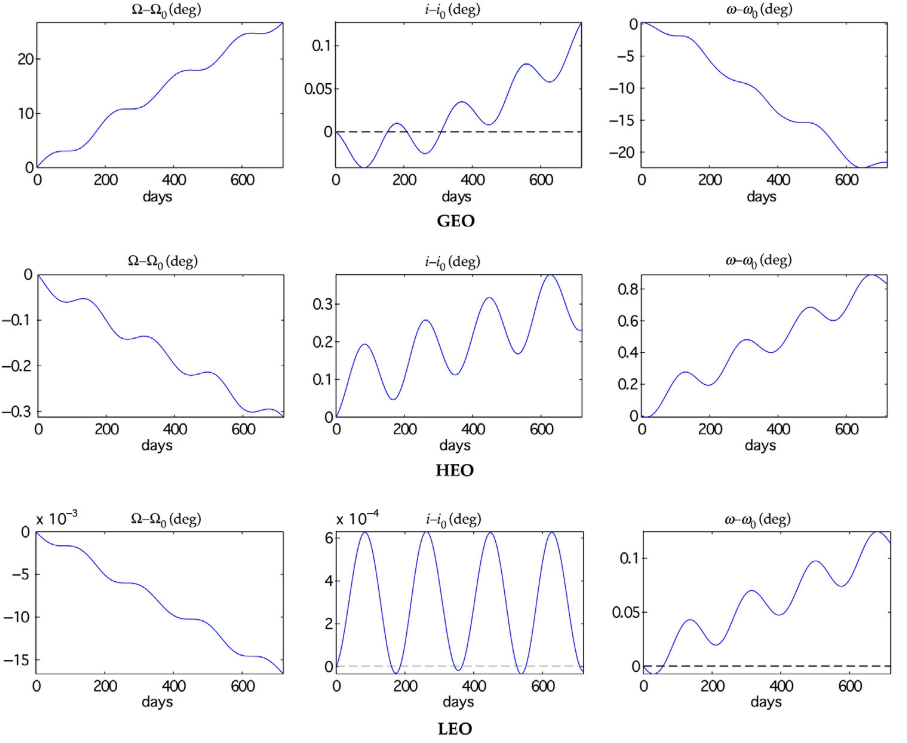

<IPython.core.display.Javascript object>


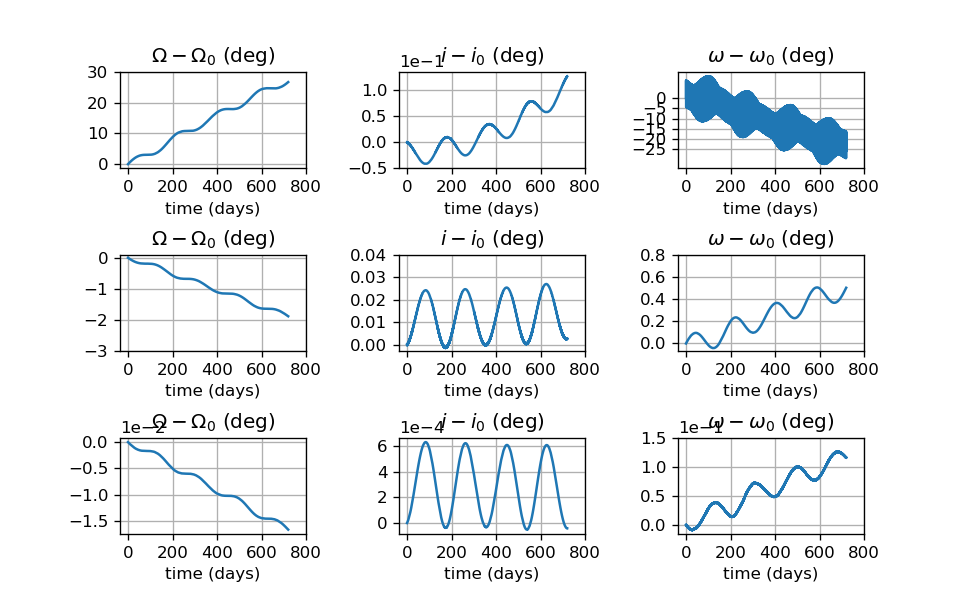

In [442]:
display(Image(filename='validation/solarGravity.png',width="600px"))

plt.figure(figsize=(8,5))
plt.subplot(331)
plt.plot(maneuver5GEO.history.t/60/60/24, (((maneuver5GEO.history.coe[:,4]-maneuver5GEO.history.coe[0,4])*180/np.pi)+180)%360-180)
plt.title("$\Omega-\Omega_0$ (deg)")
plt.xlabel("time (days)")
plt.yticks([0,10,20,30])
plt.xticks([0,200,400,600,800])
plt.grid()
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplot(332)
plt.plot(maneuver5GEO.history.t/60/60/24, (maneuver5GEO.history.coe[:,2]-maneuver5GEO.history.coe[0,2])*180/np.pi)
plt.title("$i-i_0$ (deg)")
plt.xlabel("time (days)")
plt.yticks([-0.05,0,0.05,0.1])
plt.xticks([0,200,400,600,800])
plt.grid()
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplot(333)
plt.plot(maneuver5GEO.history.t/60/60/24, (((maneuver5GEO.history.coe[:,3]-maneuver5GEO.history.coe[0,3])*180/np.pi)+180)%360-180)
plt.title("$\omega-\omega_0$ (deg)")
plt.xlabel("time (days)")
plt.yticks([0,-5,-10,-15,-20,-25])
plt.xticks([0,200,400,600,800])
plt.grid()

plt.subplot(334)
plt.plot(maneuver5HEO.history.t/60/60/24, (((maneuver5HEO.history.coe[:,4]-maneuver5HEO.history.coe[0,4])*180/np.pi)+180)%360-180)
plt.title("$\Omega-\Omega_0$ (deg)")
plt.xlabel("time (days)")
plt.yticks([0,-0.1e1,-0.2e1,-0.3e1])
plt.xticks([0,200,400,600,800])
plt.grid()
#plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplot(335)
plt.plot(maneuver5HEO.history.t/60/60/24, (maneuver5HEO.history.coe[:,2]-maneuver5HEO.history.coe[0,2])*180/np.pi)
plt.title("$i-i_0$ (deg)")
plt.xlabel("time (days)")
plt.yticks([0,0.1e-1,0.2e-1,0.3e-1,0.4e-1])
plt.xticks([0,200,400,600,800])
plt.grid()
#plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplot(336)
plt.plot(maneuver5HEO.history.t/60/60/24, (((maneuver5HEO.history.coe[:,3]-maneuver5HEO.history.coe[0,3])*180/np.pi)+180)%360-180)
plt.title("$\omega-\omega_0$ (deg)")
plt.xlabel("time (days)")
plt.yticks([0,0.2,0.4,0.6,0.8])
plt.xticks([0,200,400,600,800])
plt.grid()

plt.subplot(337)
plt.plot(maneuver5LEO.history.t/60/60/24, (((maneuver5LEO.history.coe[:,4]-maneuver5LEO.history.coe[0,4])*180/np.pi)+180)%360-180)
plt.title("$\Omega-\Omega_0$ (deg)")
plt.xlabel("time (days)")
plt.yticks([0,-5e-3,-10e-3,-15e-3])
plt.xticks([0,200,400,600,800])
plt.grid()
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplot(338)
plt.plot(maneuver5LEO.history.t/60/60/24, (maneuver5LEO.history.coe[:,2]-maneuver5LEO.history.coe[0,2])*180/np.pi)
plt.title("$i-i_0$ (deg)")
plt.xlabel("time (days)")
plt.yticks([0,2e-4,4e-4,6e-4])
plt.xticks([0,200,400,600,800])
plt.grid()
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplot(339)
plt.plot(maneuver5LEO.history.t/60/60/24, (((maneuver5LEO.history.coe[:,3]-maneuver5LEO.history.coe[0,3])*180/np.pi)+180)%360-180)
plt.title("$\omega-\omega_0$ (deg)")
plt.xlabel("time (days)")
plt.yticks([0,0.05,0.1,0.15])
plt.xticks([0,200,400,600,800])
plt.grid()
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,3))
plt.subplots_adjust(wspace=0.5,hspace=0.9)